# Computational Methods in Economics

## Lecture 2 - Computer Arithmetic

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2019-11-19 14:08:49.512026


### Preliminaries

#### Import Modules

In [2]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import numpy as np
import math

import sys
from importlib import reload

## This Lecture

- [Introduction](#introduction)
- [Integers](#int)
- [Floating-Point Numbers](#floats)
- [Appendix](#app)

----------------------------------------------------------------------------------------------------------------------
<a id = "introduction"></a>

## Introduction

Working with numbers and doing computations on a computer is inherently based on approximations. In other words, "exact" arithmetic and computer arithmetic does not always lead to the same result. Consider the example in Miranda and Fackler, p. 20:

In [3]:
print( 1e-20 + (1 - 1) )
print( (1e-20 + 1) - 1 )

1e-20
0.0


In case you are not familiar with the notation, $1\mathrm{e}{-20}$ is another way to write $1 \cdot 10^{-20}$. 


While the two expressions are mathematically equivalent and would return the correct result in exact arithmetic, only the first one is correctly evaluated. The result of the second expression, although close to the exact result, is incorrect.   

As a second example, consider the following subtraction:

In [4]:
print(1000000.2 - 1000000.1)

0.09999999997671694


In exact arithmetic, the result of this operation is 0.1. Evaluated numerically, we again see a small error. 

As a final example, consider the function $p(x) = (1 - x)^{10}$. Evaluating the multiplications, the *power series form* of this expression is

\begin{equation}
    p(x) = x^{10} - 10 x^9 + 45 x^8 - 120  x^7 + 210  x^6 - 252  x^5 + 210  x^4 - 120  x^3 + 45  x^2 - 10  x + 1  
\end{equation}

In exact arithmetic, these expressions are equivalent. If we use a computer to evaluate, say, the values between 0.99 and 1.01, we get the following:

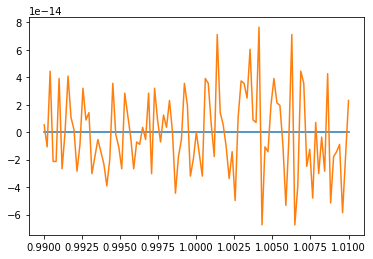

In [5]:
def fun(x):
    return (1 - x)**10

def fun2(x):
    return x**10 - 10 * x**9 + 45 * x**8 - 120 * x**7 + 210 * x**6 - 252 * x**5 + 210 * x**4 - 120 * x**3 + 45 * x**2 - 10 * x + 1  

x = np.linspace(0.99, 1.01, 103)

fig, ax = plt.subplots()
ax.plot(x, fun(x))
ax.plot(x, fun2(x))

Clearly, in exact arithmetic, the function $p$ has only one root, at $p(x) = 0$. However, its power series form exhibits multiple roots, while its functional values jump between positive and negative.

These example illustrate the approximate nature of numerical computing. More precisely, they can be explained by the way that a computer "represents" or "stores" numbers. 

----------------------------------------------------------------------------------------------------------------------
<a id = "int"></a>

## Integers

As outlined in the introductory Python sessions, we distinguish two types of numbers in numerical computing: *integers* and *floating point numbers (floats)*. From a computational perspective, the difference is how a computer stores a number. 

Without going into technical details, the first thing to understand is that a computer is essentially composed of devices (*transistors*) that can be in an "on" or "off" state.

In other words, a single transistor could physically encode information about which one of two possible states is realized; for example, these could be labeled *True* or *False*, or 0 or 1. 

From Wikipedia:

"The transistor is the key active component in practically all modern electronics. Many consider it to be one of the greatest inventions of the 20th century."

"About 60 millions transistors were built in 2002... for [each] man, woman and child on Earth."

The information encoded by a two-state device like a transistor is called a *bit* (*binary digit*). In computing, taking 8 bits together gives a *byte*.

Of course, most problems we encounter in numerical computing involve more states than 0 or 1. Hence, while a single bit does not get us very far, multiple bits together allow us to represent numerical data.

Recall that all integers (in the decimal system or *base-10 notation*) can be represented as *binary numbers* (*base-2 notation*). As a reminder, a binary number is a sequence of 

\begin{equation}
b_N b_{N-1} ... b_2 b_1 b_0,\quad b_j \in \{0, 1\}, 
\end{equation}
where
\begin{equation}
 y = b_N 2^N + b_{N-1} 2^{N-1} + ... + b_1 2^1 + b_0 2^0
\end{equation}

gives its value in base-10 notation.


For example, the binary number $1110$ is evaluated to

\begin{equation}
 y =  2^3 + 2^2 + 2^1 = 14.
\end{equation}

As a side note, Python has a **bin** function that gives a binary representation (as a *string*) of integers. Note that the first two elements in the string (**'0b'**) just indicate that what follows is a binary number, and hence can be disregarded: 

In [6]:
bin(14)

'0b1110'

In [7]:
bin(255)

'0b11111111'

The other way round works as well: you can type a sequence of 0s and 1s (not as a string!), preceded by **0b**, and Python will return the corresponding integer:

In [8]:
0b101

5

Hence, in order to represent integers of higher complexity, a computer would convert them into a binary number and then use one bit per digit. 

As an example, with 8 bits, a computer can represent the numbers between 0 and 255 (the largest integer whose binary representation has 8 digits).

In many programming languages, the number of bits used to represent an integer is limited. 

In Python 3, however, this is not an issue: integers can be arbitrarily large by assigning them more bits (to the extent permitted by memory), while still represented "precisely".

Note that how an integer is represented is only loosely linked to how the integer *object* in Python is stored. For example, you could assume that it requires only 1 byte to store the integer 255. However, the function **getsizeof()** from the **sys** module shows that its size is actually *28* bytes: 

In [9]:
sys.getsizeof(255)

28

Recall that a Python object comprises more than only the value; other things that are stored in the object, for example information on the type.

For more information on how integers are stored in Python, compare https://stackoverflow.com/questions/23016610/why-do-ints-require-three-times-as-much-memory-in-python and http://mortada.net/can-integer-operations-overflow-in-python.html.

----------------------------------------------------------------------------------------------------------------------
<a id = "floats"></a>

## Floating-Point Numbers

Floating-point numbers (*float*s) are a subset of the real numbers. That they can only be a subset is intuitive: recall that there are infinitely many real numbers, while a computer can only deal with a finite set of representations.

#### Representation: DP Numbers

There are different types of floating point numbers. In the following, we focus on 64-bit **double precision (DP)** floating point numbers (DP float or DP number), as defined by the *IEEE 754-1985 Standard for Binary Floating-Point Arithmetic*. As the name indicates, a DP float is stored using 64 bits. 

In contrast, **single precision (SP)** numbers have only 32 bits available. That said, the fundamental idea of how floats are stored and what that implies for numerical errors is analogous for SP and DP numbers.  

In the following, let $y$ denote a DP float. On a computer, $y$ is represented by three integers $s$, $e$ and $f$, according to the following formula given by the "Standard":

<a id='standard'></a>
\begin{equation}
    y = (-1)^s \cdot \left(1 + \frac{f}{2^{52}}\right) \cdot 2^{e - 1023} \tag{1}
\end{equation}


The term "floating point number" will be used to mean a real number that can be exactly represented in this way.

The key idea here is that the 64 bits used to represent a DP float are divided between $s$, $e$ and $f$, in the following way:

$s$ contains information about the sign and is either 0 or 1, i.e. 1 bit is used to store the value for $s$. 

$e$ is an 11-bit integer ("exponent"); since 2047 is the largest integer whose binary representation has 11 digits, we have 

\begin{equation}
0 \le e \le 2047
\end{equation}

For reasons omitted here, these inequalities are actually strict: $0 < e < 2047$.

In [10]:
len(bin(2047)[2:]), len(bin(2048)[2:])

(11, 12)

$f$ is a 52-bit integer ("significand"); since $2^{52} - 1$ is the the largest integer whose binary representation has 52 digits, we have

\begin{equation}
0 \le f \le 2^{52} - 1
\end{equation}

In [11]:
len(bin(2**52 - 1)[2:]), len(bin(2**52)[2:])

(52, 53)

For illustration, we define a function **comp_float** that takes a tuple consisting of $s$, $e$ and $f$ and computes the resulting floating point number:

In [12]:
def comp_float(tup):
    """
    Takes a tuple consisting of s, e and f and computes the resulting DP floating point number, according to the IEEE formula
    """
    s, e, f = tup
    
    return (-1)**s * (1 + f * 2**(-52) ) * 2**(-1023 + e)

Consider an example:

In [13]:
tup = (0, 1042, 4086335823622963)
print( comp_float(tup) )

1000000.1


We can also use the **format** function to show the number up to its, say, 20th decimal:

In [14]:
format( comp_float(tup), '.20f')

'1000000.09999999997671693563'

#### Not all real numbers are DP floats

The previous example might struck you as odd. At first glance, it seems that the tuple

\begin{equation}
    (s, e, f) = (0, 1042, 4086335823622963)
\end{equation}

used in the formula above gives you 1000000.1. Using the format function, however, shows that this was an approximation.

In fact, the number 1000000.1 "does not exist" on a computer, at least not when using DP numbers.

That is, there is no combination *(s, e, f)* with which the expression above evaluates to 1000000.1 exactly. In other words, it is not a DP float. 

"The best" a computer can do is approximating it by the DP number 1000000.09999999997671693563.

As a corollary, all numbers in between 1000000.1 and 1000000.09999999997671693563 have the same representation on a computer!

This example illustrates the key issue when using real numbers on a computer, which was already hinted to above, and becomes obvious when looking at the representation in [(1)](#standard): there are infinitely many real numbers, while there is only a *finite combination* of possible significands and exponents - recall that both $e$ and $f$ are required to be integers, and are bounded below and above. 

What follows directly from this *finite set of DP numbers* is that not all real numbers can be represented as DP floats. When working with real numbers that cannot, those are instead *approximated by the closest DP number*.  

\begin{equation}
    z \approx (z)_{DP} = z_{DP} = y
\end{equation}

where $z$ is a real number (but not a DP number), while $y$ is the closest DP number.

As a result, working with floating point numbers is inherently *approximate*. Below, we will discuss the main issues and consequences for numerical analysis. 

#### Machine epsilon

This issue is related to the the so-called **machine epsilon** (or **machine zero**) $\epsilon_{DP} $ which is defined as the distance from 1.0 to the next larger number that the computer can represent as a DP float. In double precision, it turns out to be $2^{-52}$.

To see this, first note that 1.0 can be represented by the tuple $s = 0$, $f = 0$ and $e = 1023$:

In [15]:
comp_float( (0, 1023, 0) )

1.0

Next, it is easy to verify that the float $1 + 2^{-52}$ can be represented by $s = 0$, $f = 1$ and $e = 1023$:

In [16]:
comp_float( (0, 1023, 1) ) 

1.0000000000000002

In [17]:
comp_float( (0, 1023, 1) ) == 1 + 2**(-52)

True

What about the (smaller) float $1 + 2^{-53}$? In the expression above, the combination $s = 0$, $f = 0.5$ and $e = 1023$ would do the trick. However, recall that $f$ must be an integer. Hence, it is represented *in the same way* as 1.0.

Note that in general, the distance between two adjacent DP floats is increasing in their exponent. You will show in this week's problem set that for two *adjacent* DP numbers $y_1$ and $y_2$ with $y_1 < y_2$, 

\begin{equation}
   | y_2 - y_1 | = \epsilon_{DP} 2^{e(y_1) - 1023} \equiv ulp(y_1) 
\end{equation}

The expression on the RHS is often referred to as the *ulp* ("units in last place") of a DP number.   

Hence we can conclude that it is not possible for a computer to *distinguish two numbers whose distance is less than $2^{-52}$ in double precision*: 

In [18]:
eps = 2**(-52) 
print(eps)

2.220446049250313e-16


Note that this feature explains our motivating example above:

In [19]:
print( (1e-20 + 1) - 1 )

0.0


Since

In [20]:
1e-20 < eps

True

The sum $(1\mathrm{e}{-20}+ 1)$ is not distinguishable from 1, and hence the result of the subtraction is zero.

As a final point, note that - perhaps somewhat confusing - machine zero is *not* the smallest float that can be represented on a computer. This is given by the smallest values for $e$ (1) and $f$ (0), which results in:

In [21]:
2**(-1022)

2.2250738585072014e-308

In [22]:
print( comp_float((0, 1, 0)) )

2.2250738585072014e-308


Similarly, the largest float that can be represented is given by $e = 2046$ and $f = 2^{52} - 1$:

In [23]:
print( comp_float((0, 2046, 2**52-1)) )

1.7976931348623157e+308


In Python, the **sys.float_info** function summarizes machine epsilon, as well as the max and the min values:

In [24]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

####  The set of DP numbers is not closed under the arithmetic operations

Above, we have seen that working with floating point numbers is inherently *approximate*. 

This is compounded by the fact that even if you start with two DP float, applying arithmetic operations (addition, subtraction, multiplication, division) on them does not necessarily yield a DP number as a result!

In other words, the set of DP numbers is not closed under these operations. 

As an example consider $y_1 = 2^{52} - 1$ and $y_2 = 2^{52} + 1$. First note that they integers, but of course every integer can be thought as a real number (e.g. 1.0) and must be represented by a DP number.  

We could show analytically that these are DP floats, but let's skip this her (but try to verify it yourself!). Instead, there is a simple way of checking if the *floating point representation of an integer* is a DP number, using the **float** conversion function. 

In [25]:
print( float(2**52 - 1) == 2**52 - 1 )
print( float(2**52 + 1) == 2**52 + 1 )

True
True


When **True**, this means that the float is not an approximation (since it has the same value as the integer), and hence it must be a DP number. 

Next, the product of these two DP numbers gives $y_1 y_2 = 2^{104} - 1$. Again, we can us the **float** conversion function to check whether it is a DP number (which it is not):

In [26]:
print( float( 2**104 - 1 ) == 2**104 - 1 )

False


In fact, the representation of $2^{104} - 1$ is the same as for $2^{104}$, which is a DP number:

In [27]:
comp_float( (0, 1127, 0) ) == float( 2**104 )

True

In [28]:
comp_float( (0, 1127, 0) ) == float(2**104 - 1)

True

#### Quality of Approximation

The examples above have shown that a computer *approximates a real number $z$ that is not a DP number (e.g. $2^{104} - 1$) by the DP number closest to $z$ (e.g. $2^{104}$)*. 

In the following, I denote this approximation by $z_{DP}$. The difference between $z$ and $z_{DP}$ is referred to as *roundoff error*.


Similarly, the value of a sum, difference, product or quotient of DP numbers is equal to the DP number closest to the precise result, e.g.

\begin{equation}
   y_1 + y_2 \approx (y_1 + y_2)_{DP} 
\end{equation}

It is shown in this week's problem set that 

\begin{equation}
    |\mu| \equiv \left| \frac{z_{DP} - z}{z} \right| \le \frac{1}{2} \epsilon_{DP}
\end{equation}

In words, *the absolute relative error in the DP approximation $z_{DP}$ to the real number $z$ is at most half machine epsilon*. 

What does this mean in practice? Recall that $\epsilon_{DP} = 2^{-52} \approx 2\mathrm{e}{-16}$. Hence, the absolute relative error is bounded above by about $1\mathrm{e}{-16}$. Moreover, rearranging 

\begin{equation}
    \left| z_{DP} - z \right| \le \frac{1}{2} |z| \cdot 2 \cdot 10^{-16} \le \frac{1}{2} |z|  \cdot 10^{-15}.
\end{equation}

This last expression implies that $z_{DP}$ is about 15-digits accurate as an approximation to $z$. Loosely speaking, this means that the first 15 significant digits are guaranteed to be the same.

Related to this is the following result: adding or subtracting two floats whose relative magnitudes differ by less than machine epsilon is not meaningful in the sense that the smaller value is effectively treated as zero. Formally, let $z$ and $w$ be real numbers such that

\begin{equation}
    \frac{w}{z} = r.
\end{equation}

It can be shown that for $z$ and $z + w$ to be represented by *different* DP numbers, their relative magnitude must be at least $\epsilon_{DP}$:

\begin{equation}
    (z + w)_{DP} > (z)_{DP} \ \ \Rightarrow\ \ r \ge \epsilon_{DP}
\end{equation}

The proof for this is omitted, but follows from the results above.

Consider the following example:

In [29]:
z = 1234.567
w = 1e-13
print( (w / z) < 2**(-52))
print(format(z, '.20f'))
print(format(z + w, '.20f'))

True
1234.56700000000000727596
1234.56700000000000727596


#### Propagation of Errors

To summarize what's outlined above, when working with floating point numbers, there are two sources of error:
- the error inherent in the representation of $z$ if $z$ is not a DP number
- the error introduced when an arithmetic operation is performed on two DP floats $y_1$ and $y_2$ 

Given the bound on the absolute relative approximation error, we can write 

\begin{equation}
    z_{DP} = (1 + \mu) z , \ \  \text{with}\ \ |\mu| \le \frac{1}{2} \epsilon_{DP}
\end{equation}

Moreover, suppose we perform an arithmetic operation on two DP numbers $y_1$ and $y_2$. As outlined above, the result is not in general a DP number, but instead is approximated by $(y_1 + y_2)_{DP}$. For the example of addition,

\begin{equation}
   (y_1 + y_2)_{DP} = (1 + \mu_A) (y_1 + y_2), \ \  \text{with}\ \ |\mu_A| \le \frac{1}{2} \epsilon_{DP}
\end{equation}

Analogous expression can be derived for the other arithmetic operations.  

Hence, what happens if we perform an arithmetic operation on two floats $z_1$ and $z_2$  that are not DP numbers? 

With

\begin{equation}
    (z_1)_{DP} = (1 + \mu_1) z_1 ,\ \ (z_2)_{DP} = (1 + \mu_2) z_2
\end{equation}

we get

\begin{equation}
\begin{split}
   \left[(z_1)_{DP} + (z_2)_{DP}\right]_{DP} &= (1 + \mu_A) \left[(z_1)_{DP} + (z_2)_{DP}\right] \\
   &= (1 + \mu_A) \left[(1 + \mu_1) z_1 + (1 + \mu_2) z_2 \right]
\end{split}
\end{equation}

Again, similar expressions can be derived for the other arithmetic operations.  

Usually, numerical analysis involves a large number of operations on floating point numbers. The derivation above illustrates that the approximation error in the final result (compared to exact arithmetic) is *the accumulation of errors from all the arithmetic operations, on top of the errors in the initial numbers* (e.g. parameters). 

This propagation of errors when using floating-point arithmetic also explains why it is better to use double-precision numbers than single-precision numbers. 

While the same formal arguments can be made for SP arithmetic, the relative errors $\mu$ (and hence the overall error in the final result) are (much) smaller for DP numbers.

----------------------------------------------------------------------------------------------------------------------

As a final comment, note that the actual size of an object representing a floating point number in Python is greater than 64 bit (8 byte). In fact, *all* floating point numbers, independent of their size, are stored using 24 bytes. This leads to the somewhat curious situation that the largest floating point number needs less space than the smallest integer. 

In [30]:
sys.getsizeof(1.0)

24

In [31]:
sys.getsizeof(1.7976931348623157e+308)

24

In [32]:
sys.getsizeof(1)

28

More information on floats in Python:
- https://docs.python.org/3/tutorial/floatingpoint.html
- https://stackoverflow.com/questions/4838994/float-to-binary

----------------------------------------------------------------------------------------------------------------------
<a id = "appendix"></a>

### Appendix

The following function implements going in the other direction than **comp_float** defined above: it takes a floating point number $x$ and decomposes it into the tuple consisting of $s$, $e$ and $f$. Don't worry about the exact implementation here.

In [33]:
def int_repr2(x):
    """
    Takes a floating point number $x$ and decomposes it in the tuple consisting of $s$, $e$ and $f$
    """
    n, d = x.as_integer_ratio()
    s = int(n < 0)
    
    n = abs(n)
    
    while n > 2 - 2**(-52):
        n *= 0.5
        d *= 0.5
        
    f = int( (n - 1) * 2**52 )
    e = 1023 + int( math.log(1/d)/math.log(2) )
    
    return s, e, f

    
s, e, f = int_repr2(-3210.48)
print( s, e, f )
print( comp_float( (s, e, f) ) )

1 1034 2556320554114089
-3210.48


We can also use the function **int_repr2** in another function **float_to_bin** that takes a float and translates it into its binary computer representation:

In [34]:
def float_to_bin(x):
    s, e, f = int_repr2(x)
    return "{} {:011b} {:052b}".format(s, e, f)

print( float_to_bin(-3210.48) )

1 10000001010 1001000101001111010111000010100011110101110000101001


In [35]:
int_repr2(1000000.1)

(0, 1042, 4086335823622963)

In [36]:
int_repr2(1000000.09999999997671693563)

(0, 1042, 4086335823622963)

----------------------------------------------------------------------------------------------------------------------